# Data Proprocessing Exercise

---


# Name: Lê Minh Nhật
# Student ID: 20520115


Import package

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataset

In [26]:
data = pd.read_csv('/content/data_preprocessing.csv')

Show 5 first lines of dataset

In [27]:
data.head()

,age,job,contact,duration,y
0,44.0,blue-collar,cellular,210.0,0
1,53.0,technician,cellular,138.0,0
2,28.0,management,cellular,339.0,1
3,39.0,services,cellular,185.0,0
4,55.0,retired,cellular,137.0,1


Count the 'NaN' values in each column.

In [28]:
countNULL = data.isna().sum()
countNULL

age         2
job         0
contact     6
duration    7
y           0
dtype: int64

In [29]:
# Xóa dữ liệu NaN 
data_new = data.dropna(inplace=False)
data_new.head()

,age,job,contact,duration,y
0,44.0,blue-collar,cellular,210.0,0
1,53.0,technician,cellular,138.0,0
2,28.0,management,cellular,339.0,1
3,39.0,services,cellular,185.0,0
4,55.0,retired,cellular,137.0,1


In [30]:
# Chuyển cột Age sang dữ liệu numpy interger 
data_new['age'] = data_new['age'].astype(int)
data_new

<ipython-input-30-e832c7e80e81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['age'] = data_new['age'].astype(int)


,age,job,contact,duration,y
0,44,blue-collar,cellular,210.0,0
1,53,technician,cellular,138.0,0
2,28,management,cellular,339.0,1
3,39,services,cellular,185.0,0
4,55,retired,cellular,137.0,1
...,...,...,...,...,...
41182,24,admin.,cellular,118.0,0
41183,59,retired,telephone,222.0,0
41184,31,housemaid,telephone,196.0,0
41187,25,student,telephone,112.0,0


Calculate the filling values 

In [31]:
# age
median_age = int(data['age'].mean())
median_age

40

In [32]:
# duration
mean_duration = data['duration'].median()
mean_duration

180.0

In [33]:
# contact
mode_contact = data['contact'].mode()[0]
mode_contact

'cellular'

Fill missing values

In [34]:
data['age'].fillna(value=median_age,inplace = True)
data['duration'].fillna(value = mean_duration, inplace = True)
data['contact'].fillna(value = mode_contact,inplace = True)

Show dataset after filling missing values

In [35]:
data

,age,job,contact,duration,y
0,44.0,blue-collar,cellular,210.0,0
1,53.0,technician,cellular,138.0,0
2,28.0,management,cellular,339.0,1
3,39.0,services,cellular,185.0,0
4,55.0,retired,cellular,137.0,1
...,...,...,...,...,...
41194,104.0,retired,telephone,222.0,0
41195,2.0,housemaid,cellular,180.0,0
41196,3.0,admin.,cellular,62.0,0
41197,40.0,technician,telephone,200.0,0


Show outliers in the 'age' column

In [36]:
data.age

0         44.0
1         53.0
2         28.0
3         39.0
4         55.0
         ...  
41194    104.0
41195      2.0
41196      3.0
41197     40.0
41198     40.0
Name: age, Length: 41199, dtype: float64

In [37]:
# Load package here
import seaborn as sbn

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


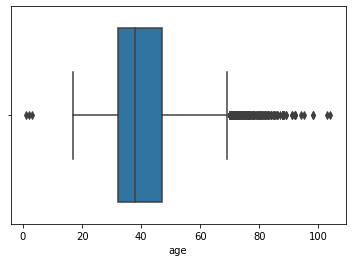

In [38]:
sbn.boxplot(data['age']);

Calculate IQR

In [39]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3-Q1
IQR

15.0

Calculate the value of lower and upper fences

In [40]:
low_fence = Q1-(1.5*IQR)
up_fence = Q3 +(1.5*IQR)  

In [41]:
low_fence

9.5

In [42]:
up_fence

69.5

Recreate a new dataset without any outliers in the 'age' column.

In [43]:
data[((data['age'] < low_fence)|(data['age']> up_fence))]

,age,job,contact,duration,y
43,72.0,retired,cellular,244.0,1
307,74.0,retired,telephone,88.0,0
334,80.0,retired,cellular,242.0,1
454,72.0,retired,cellular,257.0,1
559,75.0,retired,cellular,233.0,0
...,...,...,...,...,...
41189,103.0,technician,cellular,243.0,1
41193,1.0,admin.,cellular,180.0,0
41194,104.0,retired,telephone,222.0,0
41195,2.0,housemaid,cellular,180.0,0


In [44]:
data = data[~((data['age'] < low_fence)|(data['age']> up_fence))]
data

,age,job,contact,duration,y
0,44.0,blue-collar,cellular,210.0,0
1,53.0,technician,cellular,138.0,0
2,28.0,management,cellular,339.0,1
3,39.0,services,cellular,185.0,0
4,55.0,retired,cellular,137.0,1
...,...,...,...,...,...
41190,29.0,technician,cellular,180.0,0
41191,44.0,services,cellular,34.0,0
41192,39.0,admin.,cellular,180.0,0
41197,40.0,technician,telephone,200.0,0


In [45]:
# Kiểm tra còn giá trị NaN không 
countNULL = data.isna().sum()
countNULL

age         0
job         0
contact     0
duration    0
y           0
dtype: int64

Encode the 'job' column

In [46]:
# Load package here
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()

In [47]:
# Fit and transform here
data['job'] = lable_encoder.fit_transform(data['job'])
data

<ipython-input-47-304ff722331d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job'] = lable_encoder.fit_transform(data['job'])


,age,job,contact,duration,y
0,44.0,1,cellular,210.0,0
1,53.0,9,cellular,138.0,0
2,28.0,4,cellular,339.0,1
3,39.0,7,cellular,185.0,0
4,55.0,5,cellular,137.0,1
...,...,...,...,...,...
41190,29.0,9,cellular,180.0,0
41191,44.0,7,cellular,34.0,0
41192,39.0,0,cellular,180.0,0
41197,40.0,9,telephone,200.0,0


In [48]:
data.reset_index(drop=True, inplace=True)

Encode the 'contact' column

In [49]:
# Load package here
from sklearn.preprocessing import OneHotEncoder

In [50]:
column = 'contact'

In [51]:
# Fit and transform here
one_hot_encoder = OneHotEncoder(sparse = False)
data_new_column = one_hot_encoder.fit_transform(data[[column]])
data_new_column

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [52]:
# Recreate the new 'contact' column
new_column = pd.DataFrame(data=data_new_column,columns=one_hot_encoder.get_feature_names([column]))
new_column

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,contact_cellular,contact_telephone
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
40720,1.0,0.0
40721,1.0,0.0
40722,1.0,0.0
40723,0.0,1.0


In [53]:
# Concatenate the old and new columns (do not need to do anything here)
data = pd.concat([data.drop(columns=[column, 'duration', 'y']), new_column, data[['duration', 'y']]], axis=1)

In [54]:
# Show dataset after doing all requirements
data

,age,job,contact_cellular,contact_telephone,duration,y
0,44.0,1,1.0,0.0,210.0,0
1,53.0,9,1.0,0.0,138.0,0
2,28.0,4,1.0,0.0,339.0,1
3,39.0,7,1.0,0.0,185.0,0
4,55.0,5,1.0,0.0,137.0,1
...,...,...,...,...,...,...
40720,29.0,9,1.0,0.0,180.0,0
40721,44.0,7,1.0,0.0,34.0,0
40722,39.0,0,1.0,0.0,180.0,0
40723,40.0,9,0.0,1.0,200.0,0
